## Friction Coefficient of a F1 tire

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Read the data from data.json
with open('data.json', 'r') as f:
    data = json.load(f)

print("Data is stored in the following format:")
print("Racers:",data.keys())
print("Lap:",data['VER'].keys())
print("Lap information:",data['VER']["49"].keys())

with open("corners.json", 'r') as f:
    corners = json.load(f)

print("Corners:", corners.keys())
print("Corner 15 information:", corners["CornerNumber"][14], corners["X"][14], corners["Y"][14],corners["Angle"][14],corners["Distance"][14])
print("Corner 16 information:", corners["CornerNumber"][15], corners["X"][15], corners["Y"][15],corners["Angle"][15],corners["Distance"][15])


Data is stored in the following format:
Racers: dict_keys(['VER', 'HUL', 'PIA', 'NOR', 'SAI', 'OCO', 'ALO', 'LEC', 'BEA', 'HAM', 'ALB', 'STR', 'RUS', 'GAS'])
Lap: dict_keys(['49', '50', '51', '52'])
Lap information: dict_keys(['time', 'speed', 'distance'])
Corners: dict_keys(['CornerNumber', 'X', 'Y', 'Angle', 'Distance', 'Rotation'])
Corner 15 information: 15 2398.9521484375 -4099.2412109375 -81.47941394640335 4984.092735435512
Corner 16 information: 16 -620.4287109375 -993.7661743164062 61.329159623640706 5431.602779987257


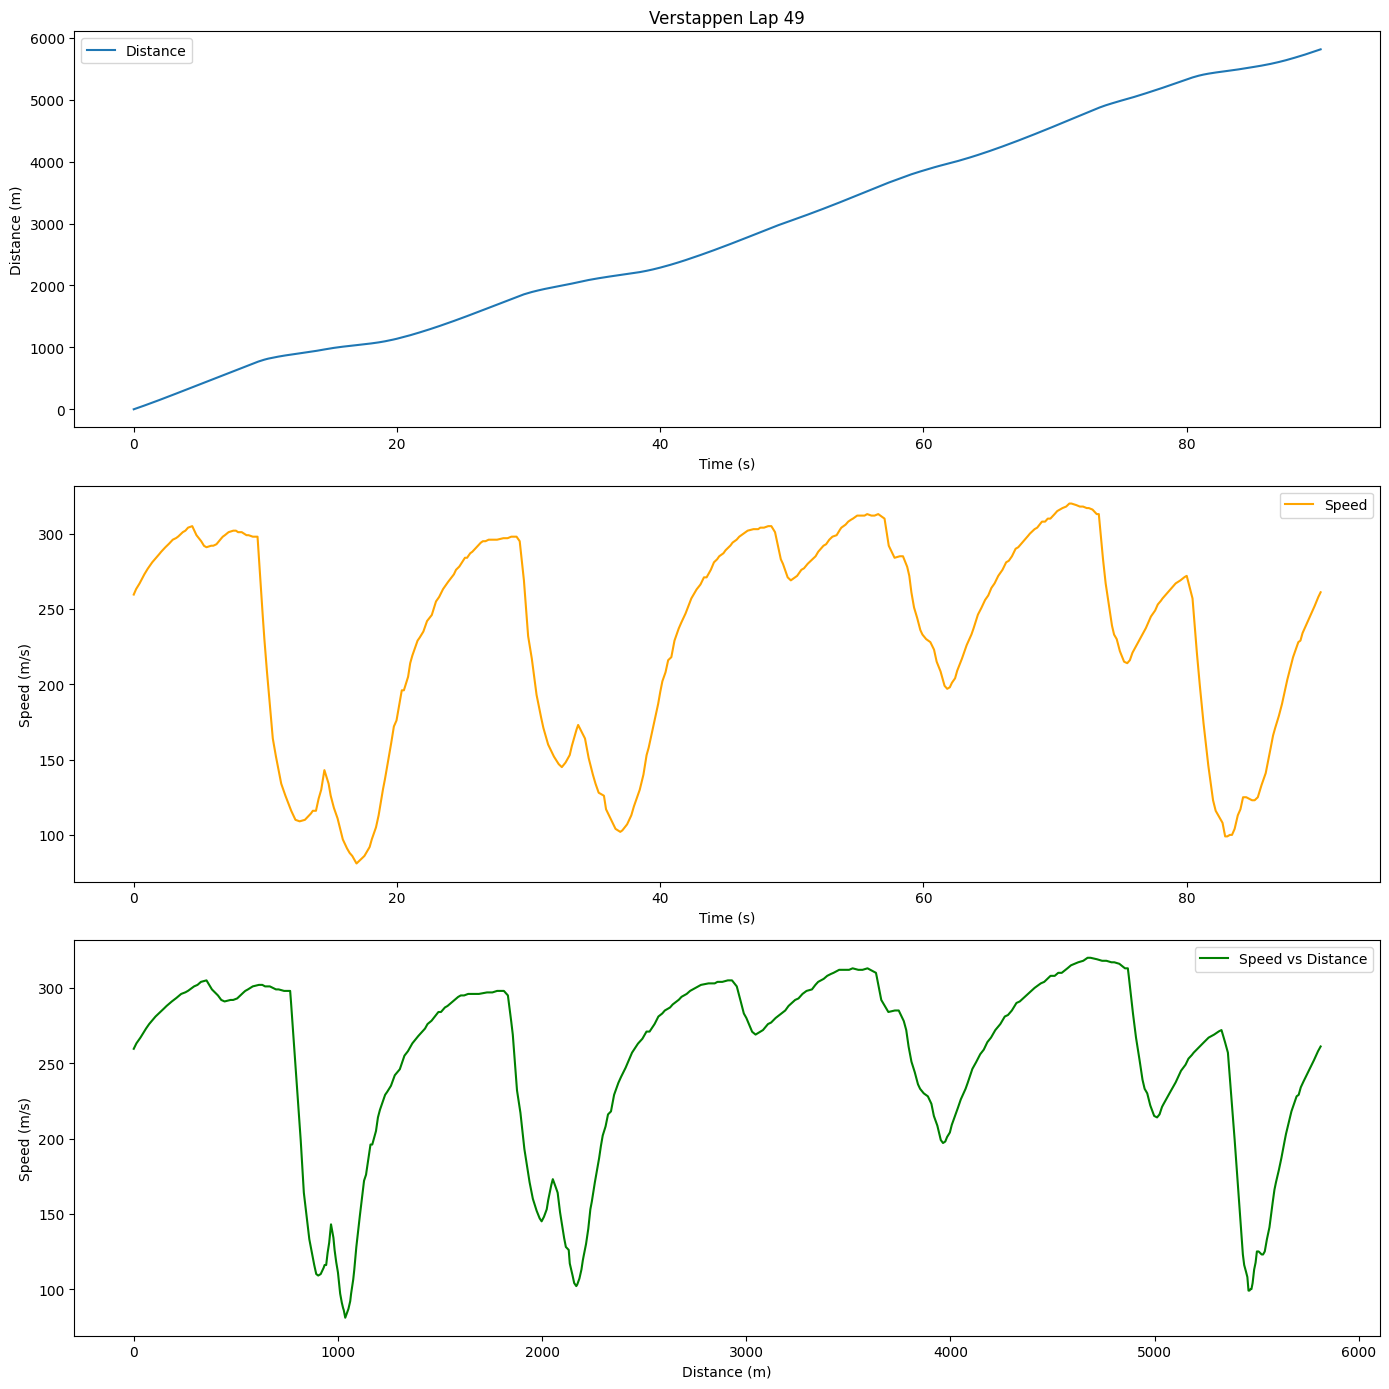

In [3]:
plt.figure(figsize=(14, 14))
plt.subplot(3, 1, 1)
plt.title("Verstappen Lap 49")
plt.plot(data['VER']["49"]['time'], data['VER']["49"]["distance"], label='Distance')
plt.xlabel("Time (s)")
plt.ylabel("Distance (m)")
plt.legend()

plt.subplot(3, 1, 2)
# plt.title("Verstappen Lap 49 Speed")
plt.plot(data['VER']["49"]['time'], data['VER']["49"]["speed"], label='Speed', color='orange')
plt.xlabel("Time (s)")
plt.ylabel("Speed (m/s)")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(data["VER"]["49"]['distance'], data["VER"]["49"]["speed"], label='Speed vs Distance', color='green')
plt.xlabel("Distance (m)")
plt.ylabel("Speed (m/s)")
plt.legend()
plt.tight_layout()
plt.show()

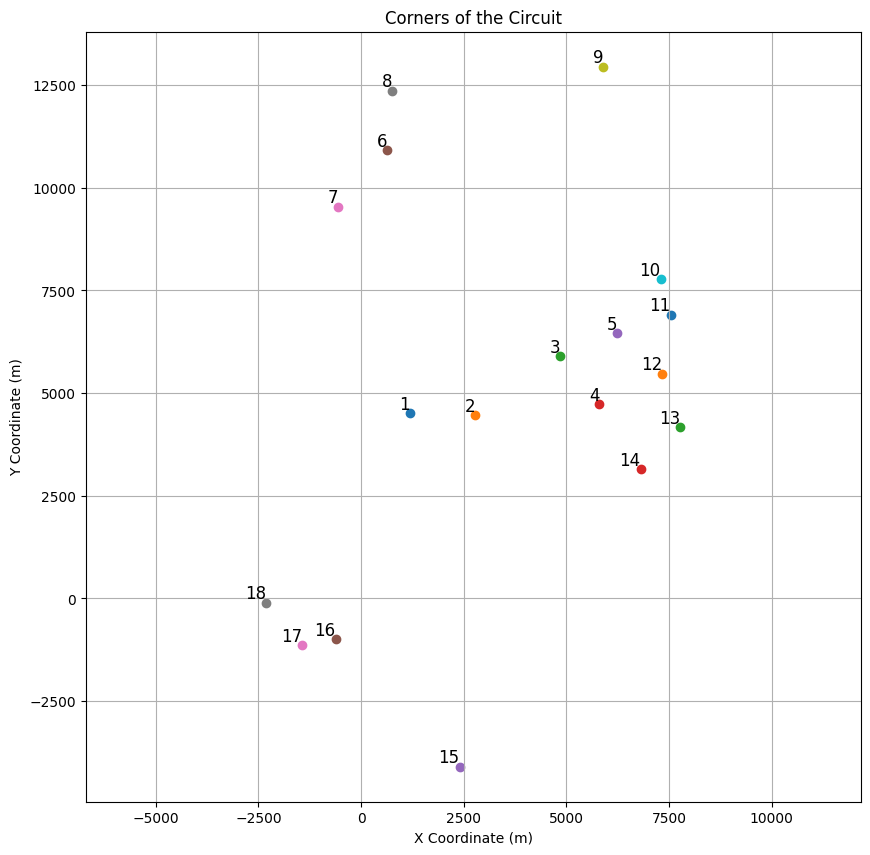

In [4]:
## Scatter plot the corner X Y coordinates
plt.figure(figsize=(10, 10))
for i in range(len(corners["CornerNumber"])):
    plt.scatter(corners["X"][i], corners["Y"][i])
    plt.annotate(corners["CornerNumber"][i], (corners["X"][i], corners["Y"][i]), fontsize=12, ha='right', va='bottom')

plt.title("Corners of the Circuit")
plt.xlabel("X Coordinate (m)")
plt.ylabel("Y Coordinate (m)")
plt.grid()
plt.axis('equal')
plt.show()

In [5]:
x = np.array(corners["X"])
y = np.array(corners["Y"])
angles = np.array(corners["Angle"])
distances = np.array(corners["Distance"])



{49: {'tel': {'time': [0.0, 0.165, 0.18, 0.34, 0.445, 0.62, 0.759, 0.805, 1.005, 1.059, 1.139, 1.359, 1.405, 1.605, 1.639, 1.805, 1.939, 2.085, 2.3, 2.32, 2.405, 2.645, 2.68, 2.965, 3.08, 3.205, 3.22, 3.365, 3.38, 3.64, 3.725, 3.8, 3.925, 4.125, 4.445, 4.619, 4.72, 4.765, 4.899, 5.099, 5.125, 5.325, 5.339, 5.526, 5.56, 5.739, 5.885, 6.045, 6.1, 6.285, 6.36, 6.565, 6.66, 6.765, 6.9, 6.925, 7.139, 7.205, 7.379, 7.565, 7.619, 7.765, 7.859, 7.925, 8.205, 8.3, 8.565, 8.6, 8.725, 8.86, 9.045, 9.16, 9.4, 9.405, 9.46, 9.725, 9.8, 9.925, 10.02, 10.125, 10.22, 10.42, 10.565, 10.64, 10.72, 10.805, 10.981, 11.005, 11.205, 11.24, 11.5, 11.525, 11.899, 11.965, 12.179, 12.286, 12.519, 12.605, 12.94, 13.005, 13.099, 13.445, 13.46, 13.605, 13.7, 13.845, 13.919, 14.02, 14.045, 14.245, 14.26, 14.485, 14.5, 14.78, 14.805, 14.965, 15.1, 15.205, 15.42, 15.485, 15.86, 15.885, 16.02, 16.205, 16.405, 16.46, 16.605, 16.68, 16.925, 17.12, 17.165, 17.28, 17.525, 17.58, 17.879, 17.925, 18.04, 18.085, 18.199, 18.40

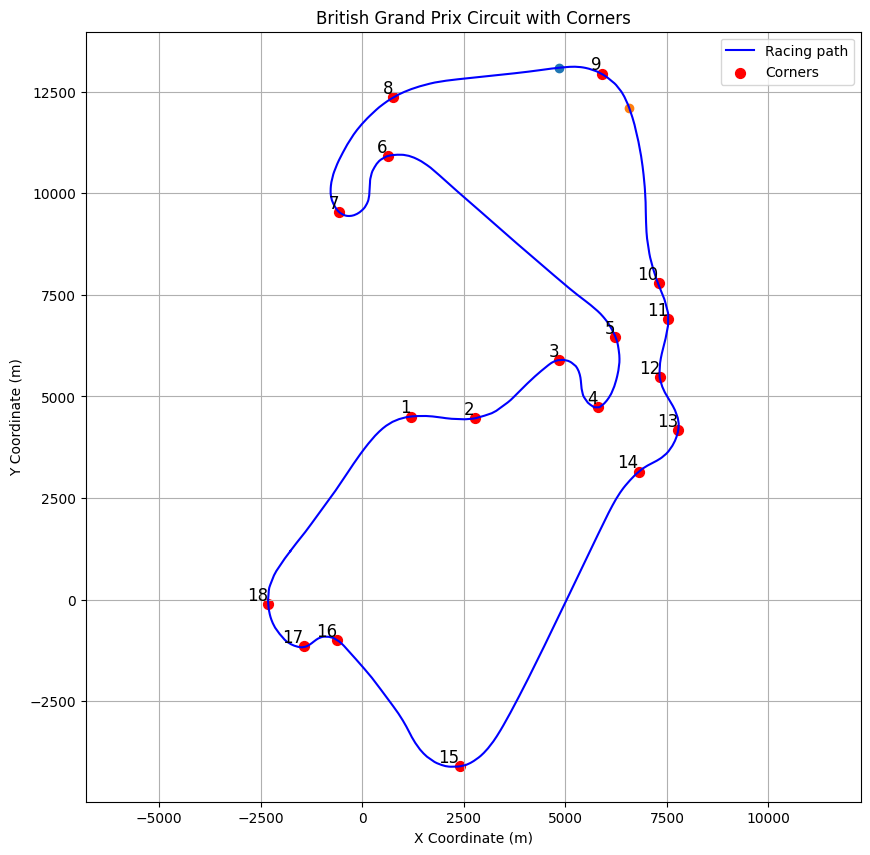

In [19]:
from pathlib import Path
import json

# Base path (already inside F1_friction)
race_data_path = Path("RaceData")

# Store data as { "Driver": { lap_number: data_dict } }
race_data = {}

# Loop over each driver directory
for driver_dir in race_data_path.iterdir():
    if driver_dir.is_dir():
        driver_name = driver_dir.name
        race_data[driver_name] = {}

        # Only include laps 49 to 52
        for lap in range(49, 53):
            json_file = driver_dir / f"{lap}_tel.json"
            if json_file.exists():
                with open(json_file, "r") as f:
                    try:
                        race_data[driver_name][lap] = json.load(f)
                    except json.JSONDecodeError as e:
                        print(f"Failed to load {json_file}: {e}")
print(race_data["VER"])
print(race_data["VER"][49]["tel"].keys())

full_racer_data = {}

for racer in race_data:
    full_racer_data[racer] = {}

    for lap in range(49, 53):
        full_racer_data[racer][lap] = {}
        try:
            for key in race_data[racer][lap]["tel"].keys():
                full_racer_data[racer][lap][key] = race_data[racer][lap]["tel"][key]
        except KeyError as e:
            #delete racer if lap not found
            print(f"Lap {lap} not found for {racer}, deleting racer")
            del full_racer_data[racer]
            break

plt.figure(figsize=(10, 10))
plt.plot(full_racer_data['VER'][49]["x"], full_racer_data['VER'][49]["y"], label='Racing path', color='blue')
plt.scatter(corners["X"], corners["Y"], c='red', label='Corners', s=50)
for i in range(len(corners["CornerNumber"])):
    plt.annotate(corners["CornerNumber"][i], (corners["X"][i], corners["Y"][i]), fontsize=12, ha='right', va='bottom')

plt.scatter(4836.0, 13089.0)
plt.scatter(6572.0, 12106.0)
plt.legend()
plt.title("British Grand Prix Circuit with Corners")
plt.xlabel("X Coordinate (m)")
plt.ylabel("Y Coordinate (m)")
plt.grid()
plt.axis('equal')
plt.show()





In [7]:
idxs = np.where(np.array(full_racer_data["VER"][49]["y"]) < -3100)[0]  # Find indices where y coordinate is less than -3100
corner_start = idxs[0]  # Start of the corner
corner_end = idxs[-1]  # End of the corner

distance = full_racer_data["VER"][49]["distance"][corner_end] - full_racer_data["VER"][49]["distance"][corner_start]
print(f"Distance of the corner: {distance} m")
print("Start of turn",full_racer_data["VER"][49]["distance"][corner_start])
print("End of turn",full_racer_data["VER"][49]["distance"][corner_end] )

#Find coordinates of start and end
start_x = full_racer_data["VER"][49]["x"][corner_start]
start_y = full_racer_data["VER"][49]["y"][corner_start]
end_x = full_racer_data["VER"][49]["x"][corner_end]
end_y = full_racer_data["VER"][49]["y"][corner_end]
print(f"Start coordinates: ({start_x}, {start_y})")
print(f"End coordinates: ({end_x}, {end_y})")


velocities = np.array(full_racer_data["VER"][49]["speed"])
corner_velocities = velocities[corner_start:corner_end+1]
average_velocity = np.mean(corner_velocities)
print("Velocity at the start of the corner:", corner_velocities[0])
print("Velocity at the end of the corner:", corner_velocities[-1])
print("Average velocity during the corner:", average_velocity)

print(corner_start, corner_end)

Distance of the corner: 310.98318296514117 m
Start of turn 4840.210428145971
End of turn 5151.193611111112
Start coordinates: (3406.0, -3214.0)
End coordinates: (1087.2208418169137, -3123.9094299498183)
Velocity at the start of the corner: 314.56112700967986
Velocity at the end of the corner: 249.0
Average velocity during the corner: 248.98890347835396
554 586


In [78]:
turn9 = np.where(abs(np.array(data['VER']["49"]["distance"]) - corners["Distance"][8]) < 3)[0][0]
print("Turn 9 start mid:", turn9)


ex = 2
start6 = full_racer_data["VER"][49]["x"][turn9-ex], full_racer_data["VER"][49]["y"][turn9-ex]
end6 = full_racer_data["VER"][49]["x"][turn9+ex], full_racer_data["VER"][49]["y"][turn9+ex]
print("Start of turn 6:", start6)
print("End of turn 6:", end6)

d0 = np.array(full_racer_data["VER"][49]["distance"])[turn9-ex]
d1 = np.array(full_racer_data["VER"][49]["distance"])[turn9+ex]
distance9 = d1 - d0 
print("Distance of turn 9:", distance9)

r9 = distance9/(np.pi )
print("Radius of the corner:", r9)

velocities9 = np.array(full_racer_data["VER"][49]["speed"])[turn9] / 3.6
average_velocity9 = np.mean(velocities9)
print("Average velocity during turn 9:", average_velocity9)
start_of_corner_15 = 4840
end_of_corner_15 = 5150
r15 = (end_of_corner_15 - start_of_corner_15) / np.pi
print("Radius of corner 15:", r15)
velocities15 = np.array(full_racer_data["VER"][49]["speed"])[corner_start:corner_end+1] / 3.6
average_velocity15 = np.mean(velocities15)
print("Average velocity during corner 15:", average_velocity15)

Turn 9 start mid: 377
Start of turn 6: (5761.734458333831, 13005.353090279843)
End of turn 6: (6032.0, 12853.0)
Distance of turn 9: 31.08319978006648
Radius of the corner: 9.894089784220988
Average velocity during turn 9: 74.72222222222221
Radius of corner 15: 98.6760647169751
Average velocity during corner 15: 69.16358429954275


In [79]:
C_D = (r9/average_velocity9**2 - r15/average_velocity15**2)*9.81*800 / (r15 - r9)
print("Coefficient of drag:", C_D)
print(r9/average_velocity9**2 , r15/average_velocity15**2, 9.81*800/(r15 - r9))

Coefficient of drag: -1.6667953063644265
0.0017720512928719066 0.020627986449303956 88.39632150494838


In [85]:
for i in range(50):
    ex = i
    start6 = full_racer_data["VER"][49]["x"][turn9-ex], full_racer_data["VER"][49]["y"][turn9-ex]
    end6 = full_racer_data["VER"][49]["x"][turn9+ex], full_racer_data["VER"][49]["y"][turn9+ex]
    # print("Start of turn 6:", start6)
    # print("End of turn 6:", end6)

    d0 = np.array(full_racer_data["VER"][49]["distance"])[turn9-ex]
    d1 = np.array(full_racer_data["VER"][49]["distance"])[turn9+ex]
    distance9 = d1 - d0 
    # print("Distance of turn 9:", distance9)

    r9 = distance9/(np.pi *1.25)
    # print("Radius of the corner:", r9)

    velocities9 = np.array(full_racer_data["VER"][49]["speed"])[turn9] / 3.6
    average_velocity9 = np.mean(velocities9)
    # print("Average velocity during turn 9:", average_velocity9)
    start_of_corner_15 = 4840
    end_of_corner_15 = 5150
    r15 = (end_of_corner_15 - start_of_corner_15) / np.pi
    # print("Radius of corner 15:", r15)
    velocities15 = np.array(full_racer_data["VER"][49]["speed"])[corner_start:corner_end+1] / 3.6
    average_velocity15 = np.mean(velocities15)
    # print("Average velocity during corner 15:", average_velocity15)
    C_D = (r9/average_velocity9**2 - r15/average_velocity15**2)*9.81*800 / (r15 - r9)
    print(f"{i}","Coefficient of drag:", C_D)
    # print(r9/average_velocity9**2 , r15/average_velocity15**2, 9.81*800/(r15 - r9))

0 Coefficient of drag: -1.6406049239850564
1 Coefficient of drag: -1.6520118127167298
2 Coefficient of drag: -1.661100415907106
3 Coefficient of drag: -1.6916054566957495
4 Coefficient of drag: -1.7030037117893404
5 Coefficient of drag: -1.7154765843202369
6 Coefficient of drag: -1.7438532562342106
7 Coefficient of drag: -1.7688546176006814
8 Coefficient of drag: -1.8097791021515273
9 Coefficient of drag: -1.858534176768782
10 Coefficient of drag: -1.8966722042714217
11 Coefficient of drag: -1.9476155609427863
12 Coefficient of drag: -1.9921564423580769
13 Coefficient of drag: -2.102512606302082
14 Coefficient of drag: -2.340180285284295
15 Coefficient of drag: -2.798024673617086
16 Coefficient of drag: -3.191795180166134
17 Coefficient of drag: -5.479956823462047
18 Coefficient of drag: -43.945438338013474
19 Coefficient of drag: 12.895053509051785
20 Coefficient of drag: 3.2383779026183563
21 Coefficient of drag: 0.6202097914602852
22 Coefficient of drag: 0.13774144880289144
23 Coeff

In [3]:
#read data.json
import json
with open('data.json', 'r') as f:
    data = json.load(f)


# delete data['Racer']["lapnumber"]["speed"]
for racer in data.keys():
    for lap in data[racer].keys():
        if "speed" in data[racer][lap]:
            del data[racer][lap]["speed"]

import numpy as np
#Convert the data to a numpy array
for racer in data.keys():
    for lap in data[racer].keys():
        for key in data[racer][lap].keys():
            data[racer][lap][key] = np.array(data[racer][lap][key])

import pickle
with open('Racing_data.pkl', 'wb') as f:
    pickle.dump(data, f)

In [20]:
from pathlib import Path
import json

# Base path (already inside F1_friction)
race_data_path = Path("RaceData")

# Store data as { "Driver": { lap_number: data_dict } }
race_data = {}

# Loop over each driver directory
for driver_dir in race_data_path.iterdir():
    if driver_dir.is_dir():
        driver_name = driver_dir.name
        race_data[driver_name] = {}

        # Only include laps 49 to 52
        for lap in range(40,53):
            json_file = driver_dir / f"{lap}_tel.json"
            if json_file.exists():
                with open(json_file, "r") as f:
                    try:
                        race_data[driver_name][lap] = json.load(f)
                    except json.JSONDecodeError as e:
                        print(f"Failed to load {json_file}: {e}")


In [21]:
print(race_data["VER"])
print(race_data["VER"][49]["tel"].keys())

data = {}

for racer in race_data:
    data[racer] = {}

    for lap in range(40,53):
        data[racer][lap] = {}
        try:
            for key in race_data[racer][lap]["tel"].keys():
                data[racer][lap][key] = race_data[racer][lap]["tel"][key]
        except KeyError as e:
            #delete racer if lap not found
            print(f"Lap {lap} not found for {racer}, deleting racer")
            del data[racer]
            break
    

print(data["VER"].keys())

necessary_keys = [
    "time",
    "speed",
    "distance"
]


for racer in data:
    for lap in data[racer]:
        for key in list(data[racer][lap].keys()):
            if key not in necessary_keys:
                del data[racer][lap][key]   



{40: {'tel': {'time': [0.0, 0.141, 0.199, 0.501, 0.558, 0.661, 0.858, 0.941, 1.019, 1.178, 1.381, 1.397, 1.598, 1.858, 1.941, 2.038, 2.261, 2.318, 2.658, 2.661, 2.818, 2.861, 3.018, 3.06, 3.319, 3.501, 3.619, 3.661, 3.821, 3.879, 4.061, 4.098, 4.341, 4.479, 4.581, 4.699, 4.941, 5.078, 5.221, 5.319, 5.539, 5.581, 5.759, 5.781, 6.039, 6.061, 6.301, 6.359, 6.501, 6.599, 6.781, 6.818, 6.981, 7.098, 7.181, 7.421, 7.459, 7.619, 7.621, 7.781, 7.878, 8.021, 8.098, 8.261, 8.458, 8.581, 8.638, 8.821, 8.918, 8.981, 9.238, 9.261, 9.579, 9.661, 9.918, 10.101, 10.341, 10.399, 10.621, 10.679, 10.781, 10.959, 10.981, 11.181, 11.219, 11.338, 11.461, 11.621, 11.819, 11.941, 12.079, 12.379, 12.381, 12.701, 12.859, 13.019, 13.181, 13.399, 13.421, 13.739, 13.741, 13.959, 14.061, 14.278, 14.341, 14.501, 14.658, 14.741, 14.958, 15.061, 15.138, 15.318, 15.501, 15.559, 15.638, 15.839, 15.901, 16.018, 16.181, 16.298, 16.46, 16.618, 16.701, 16.919, 16.941, 17.158, 17.181, 17.421, 17.438, 17.581, 17.598, 17.819, 

In [16]:
def calculate_mu(velocity: float, r: float, g: float) -> float:
    """
    Calculate the friction coefficient (mu) using the formula:
    
    mu = velocity^2 / (g * r)
    
    where:
    
    Parameters
    ----------
    velocity: float
        The average velocity in m/s.
    r: float
        The radius of the turn in meters.
    g: float
        The acceleration due to gravity in m/s^2.
    
    Returns
    -------
    mu: float
        The friction coefficient.
    """
    return velocity**2 / (g * r)

In [22]:
#First create design matrix
lap_numbers = sorted([int(lap) for lap in data["VER"].keys()])
drivers = list(data.keys())

start_of_corner_15 = 4840
end_of_corner_15 = 5150
#find index where distance is 4840 and 5150
r = (end_of_corner_15 - start_of_corner_15) / np.pi
g = 9.81  # Acceleration due to gravity in m/s^2

idxs = np.where(np.array(data['VER'][49]["distance"]) >= start_of_corner_15)[0], np.where(np.array(data['VER'][49]["distance"]) <= end_of_corner_15)[0]
start_idx = idxs[0][0]
end_idx = idxs[1][-1]





X = []
y = []

for lap in lap_numbers:
    mu_array = []
    for driver in drivers:

        velocity = np.mean(data[driver][lap]["speed"][start_idx:end_idx]) / 3.6

        mu = calculate_mu(velocity, r, g)
        mu_array.append(mu)
    
    X.append([1, lap])  # Intercept term and lap number
    y.append(np.mean(mu_array))  # Average friction coefficient for the lap

X = np.array(X) #convert to numpy array
y = np.array(y) #convert to numpy array

# Now do the OLS calculation
beta = np.linalg.inv(X.T @ X) @ X.T @ y #calculate the beta coefficients

print("Coefficients (beta):", beta)

Coefficients (beta): [11.17593433 -0.11473336]


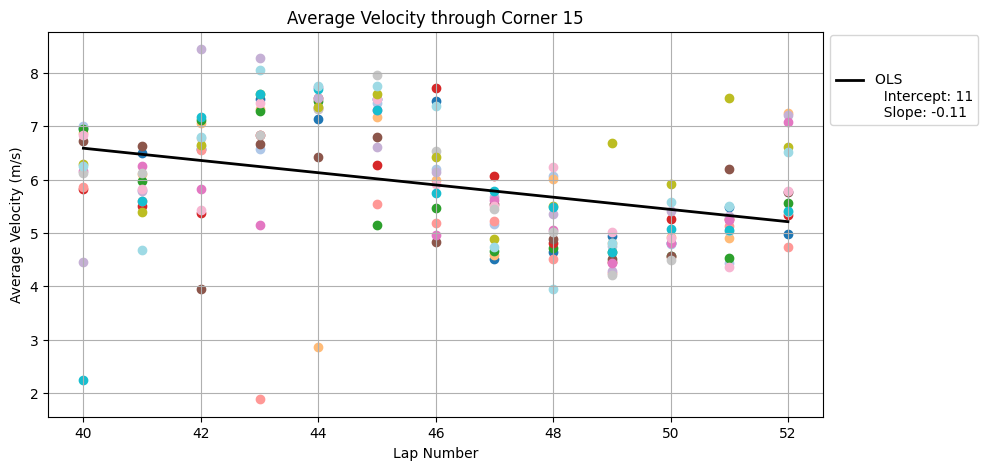

In [23]:
import matplotlib.pyplot as plt
colors = plt.cm.tab20(np.linspace(0, 1, len(data)))

plt.figure(figsize=(10, 5))
for i, driver in enumerate(data):
    color = colors[i]  
    for lap in data[driver]:
        velocity = np.mean(data[driver][lap]["speed"][start_idx:end_idx]) / 3.6
        plt.scatter(int(lap), calculate_mu(velocity, r, g), color=color, label=driver if lap == "49" else "")

plt.plot(lap_numbers, beta[0] + beta[1] * np.array(lap_numbers), color='black',label=f'\n\nOLS \n  Intercept: {beta[0]:.2g}\n  Slope: {beta[1]:.2g}', linewidth=2)


plt.xlabel("Lap Number")
plt.ylabel("Average Velocity (m/s)")
plt.title("Average Velocity through Corner 15")
plt.legend(ncol=1, bbox_to_anchor=(1, 1.01))
plt.grid()
plt.show()